In [47]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\lottery_study\lottery_study\lottery_study_updated.csv'
df = pd.read_csv(file_path)
# Remove duplicates from the dataframe
df = df.drop_duplicates()
# Display the first few rows of the dataframe
df

,ideology,religion,risk_seeking,expend_total,seems_fun,enjoy_thinking,self_control,risk_aversion,gender,age,...,gamblers_fallacy,non_belief_lln,ev_miscalculation,income_effects_delta_pct,state,expenditures_share_income,education_5,education_10,education_15,education_20
0,Extremely Conservative,1.0,-3,0.0,-3 - Strongly Disagree,-3 - Strongly Disagree,0 - The right amount,Average financial risks expecting to earn aver...,Male,72.0,...,0.666667,0.138633,0.50,0.0,AK,0.000000,1,1,1,0
1,Moderate,0.0,-4,10.0,0 - Neutral,0 - Neutral,0 - The right amount,Average financial risks expecting to earn aver...,Female,61.0,...,0.000000,0.427033,0.50,7.5,AK,0.108108,1,1,0,0
2,Slightly Conservative,1.0,-4,0.0,0 - Neutral,1,0 - The right amount,Above-average financial risks expecting to ear...,Male,30.0,...,0.000000,0.597033,1.00,0.0,AK,0.000000,1,1,1,0
3,Slightly Liberal,0.0,-3,0.0,0 - Neutral,3 - Strongly Agree,-3 - Far too little,Above-average financial risks expecting to ear...,Female,68.0,...,0.000000,0.510367,1.00,-50.0,AK,0.000000,1,1,0,0
4,Conservative,1.0,-4,1.0,1,3 - Strongly Agree,0 - The right amount,Average financial risks expecting to earn aver...,Male,68.0,...,0.000000,0.427033,0.75,NaN,AL,0.018182,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,Liberal,0.0,-4,10.0,2,2,0 - The right amount,Average financial risks expecting to earn aver...,Male,66.0,...,1.000000,0.122900,0.75,0.0,WV,0.444444,1,1,0,0
2883,Conservative,0.0,-7 - Very willing,10.0,1,1,0 - The right amount,Average financial risks expecting to earn aver...,Male,28.0,...,0.000000,0.427033,1.00,0.0,WY,0.072727,1,1,0,0
2884,Extremely Liberal,0.0,-4,1.0,1,1,0 - The right amount,Above-average financial risks expecting to ear...,Female,67.0,...,0.666667,0.460367,1.00,0.0,WY,0.010811,1,1,1,1
2885,Conservative,1.0,-3,0.0,0 - Neutral,-2,0 - The right amount,Average financial risks expecting to earn aver...,Female,57.0,...,0.666667,0.273700,0.50,0.0,WY,0.000000,1,1,1,0


In [48]:
#clean data
df.dropna(inplace=True)

In [49]:
#convert columns to numeric
df['expend_total'] = pd.to_numeric(df['expend_total'], errors='coerce')


In [50]:
# Define the threshold for outliers
threshold = 1901.0

# Filter out the outliers
df = df[df['expend_total'] <= threshold]


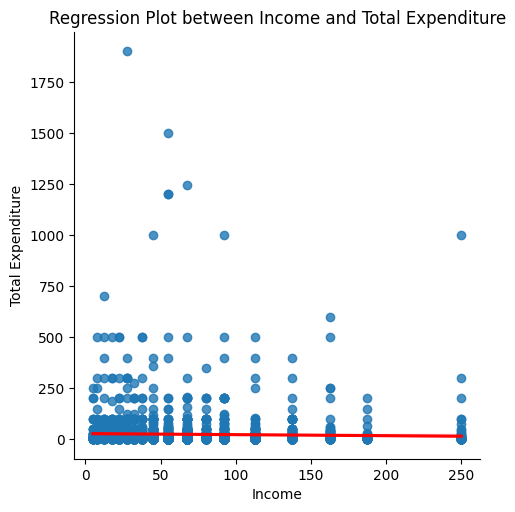

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot with a custom color for the regression line
sns.lmplot(x='income', y='expend_total', data=df, line_kws={'color': 'red'})
plt.xlabel('Income')
plt.ylabel('Total Expenditure')
plt.title('Regression Plot between Income and Total Expenditure')
plt.show()


<Figure size 1000x600 with 0 Axes>

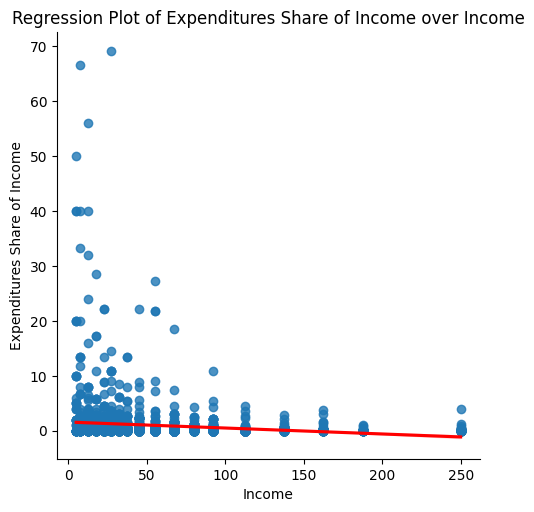

In [52]:
# Create a regression plot of expenditures_share_income over income
plt.figure(figsize=(10, 6))
sns.lmplot(x='income', y='expenditures_share_income', data=df, line_kws={'color': 'red'})
plt.xlabel('Income')
plt.ylabel('Expenditures Share of Income')
plt.title('Regression Plot of Expenditures Share of Income over Income')
plt.show()

Please explore the relationship between the monthly lottery expenditure variable 
and income



Previous knowledge on the topic suggests that higher-income individuals tend to spend less on lotteries. However, based on our initial observations, this does not appear to be the case. When plotting income on the x-axis and lottery expenditure on the y-axis, we expect a negative slope, reflecting the anticipated inverse relationship. Instead, our observations reveal a nearly flat line, although there is a slight downward trend.  

Additionally, when examining lottery expenditure as a share of income, we find that lower-income individuals allocate a larger proportion of their income to lottery tickets compared to higher-income individuals. Some observations show extreme cases where up to 70% of income is spent on lottery tickets, aligning with preconceived notions about lottery spending behavior among low-income groups.  

To investigate this further, we will conduct a multiple regression analysis using cross-sectional data.  

- **Dependent Variable**: Lottery expenditure  
- **Independent Variable**: Income  
- **Control Variables**: Age, race (Black, Hispanic, White), gender, marital status, urban residence, employment status, religion, education level, ideology, and state of residence.  

To account for age-related life-cycle effects, we will create dummy variables representing different age groups:  
1. **Not Working Age**  
2. **Early Working Age**  
3. **Late Working Age**  
4. **Retired**  

These dummy variables will capture differential effects across these age categories. This approach will allow us to better understand the relationships between income, demographic factors, and lottery expenditure.  

I will also be using idelogy as a sliding continous scale from left (liberal) to right (conservative) as my variabel. 

The regression formula is:  

$$
Y_i = \beta_0 + \beta_1 \text{Income}_i + \sum_{j=1}^{p} \gamma_j C_{ij} + \sum_{k=1}^{q} \delta_k A_{ik} + \epsilon_i
$$

Where:  
- $Y_i$: Lottery expenditure (dependent variable)  
- $\text{Income}_i$: Individual income (main independent variable)  
- $\sum_{j=1}^{p} \gamma_j C_{ij}$: Summation over $p$ control variables ($C_{ij}$) with coefficients $\gamma_j$. Control variables include:  
  - Race ($\text{Black}_i, \text{Hispanic}_i, \text{White}_i$)  
  - Gender  
  - Marital status  
  - Urban residence  
  - Employment status  
  - Religion  
  - Education  
  - Ideology  
  - State  
- $\sum_{k=1}^{q} \delta_k A_{ik}$: Summation over $q$ age life-cycle dummies ($A_{ik}$) with coefficients $\delta_k$. These variables are:  
Let:\
- **NotWorkingAge**: $A_{i1} = 1$ if age $< 15$, else $A_{i1} = 0$
- **EarlyWorkingAge**: $A_{i2} = 1$ if $15 \leq \text{age}_i < 30$, else $A_{i2} = 0$
- **LateWorkingAge**: $A_{i3} = 1$ if $30 \leq \text{age}_i < 60$, else $A_{i3} = 0$
- **Retired**: $A_{i4} = 1$ if $\text{age}_i \geq 60$, else $A_{i4} = 0$

- $\epsilon_i$: Error term  


In [53]:
import pandas as pd

# Define age thresholds
age_thresholds = {
    'not_working_age': 15,   # Not working age: age < 15
    'early_working_age': 30, # Early working age: 15 <= age < 30
    'late_working_age': 60,  # Late working age: 30 <= age < 60
    'retired': 60            # Retired: age >= 60
}


# Apply thresholds to create indicator columns
for label, threshold in age_thresholds.items():
    if label == 'not_working_age':
        df[label] = df['age'].apply(lambda x: 1 if x < threshold else 0)
    elif label == 'retired':
        df[label] = df['age'].apply(lambda x: 1 if x >= threshold else 0)
    elif label == 'early_working_age':
        df[label] = df['age'].apply(lambda x: 1 if 15 <= x < threshold else 0)
    elif label == 'late_working_age':
        df[label] = df['age'].apply(lambda x: 1 if 25 <= x < threshold else 0)

# Select columns to view
result = df[['age', 'not_working_age', 'early_working_age', 'late_working_age', 'retired']]
result

,age,not_working_age,early_working_age,late_working_age,retired
0,72.0,0,0,0,1
1,61.0,0,0,0,1
2,30.0,0,0,1,0
3,68.0,0,0,0,1
5,68.0,0,0,0,1
...,...,...,...,...,...
2881,77.0,0,0,0,1
2882,66.0,0,0,0,1
2883,28.0,0,1,1,0
2884,67.0,0,0,0,1


In [54]:
df['ideology'].unique()

array(['Extremely Conservative', 'Moderate', 'Slightly Conservative',
       'Slightly Liberal', 'Conservative', 'Liberal', 'Extremely Liberal'],
      dtype=object)

In [55]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Mapping dictionary
ideology_mapping = {
    'Extremely Liberal': 1,
    'Liberal': 2,
    'Slightly Liberal': 3,
    'Moderate': 4,
    'Slightly Conservative': 5,
    'Conservative': 6,
    'Extremely Conservative': 7
}

# Apply the mapping
df['ideology'] = df['ideology'].map(ideology_mapping)

df['ideology']


0       7
1       4
2       5
3       3
5       4
       ..
2881    2
2882    2
2883    6
2884    1
2885    6
Name: ideology, Length: 2772, dtype: int64

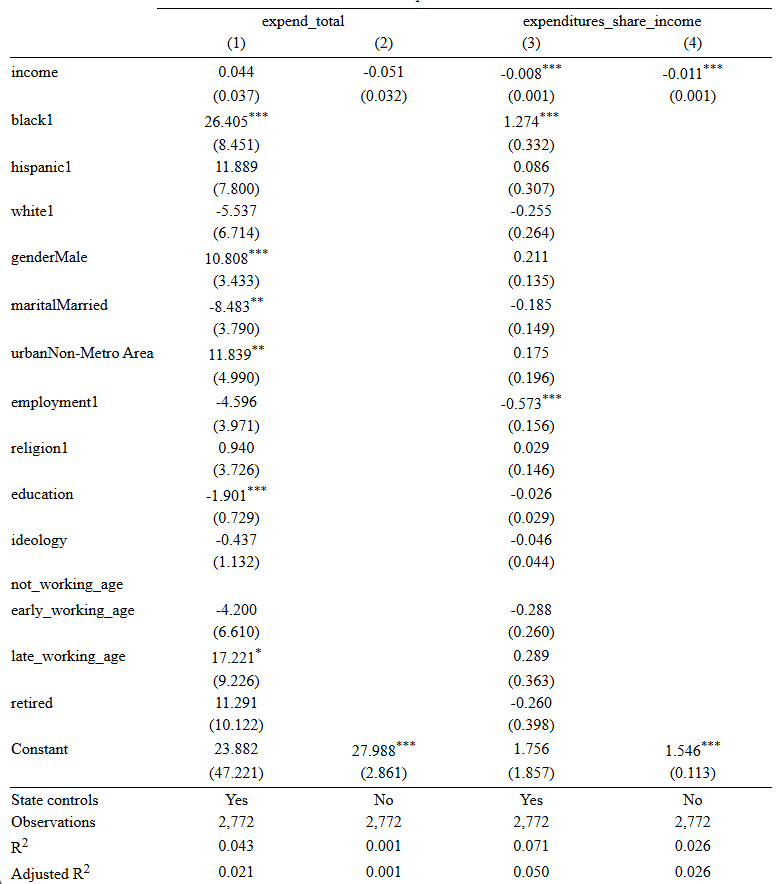

In [56]:
from IPython.display import Image

# Display the image
Image(filename=r'C:\Users\clint\Desktop\Coding Task Darthmouth\lottery_study\lottery_study\images\5.png')

Our findings indicate that the relationship between income and lottery ticket expenditure is weak. After controlling for variables such as race, gender, marital status, urban location, employment, religion, education, ideology, and age, we identified that more significant determinants of lottery expenditure include education, working age, race, gender, marital status, urban area, and age life cycle. When we use expenditure as a share of income as our dependent variable, the results align with our previous observations from the scatterplot. Specifically, individuals with higher incomes tend to spend a smaller proportion of their income on lottery tickets. This effect remains consistent even with all the controls mentioned earlier. Additionally, the results suggest that employment and race are more significant variables concerning ticket expenditure as a share of income.

I will explore the relationship between the monthly lottery expenditure variable and the preference and bias proxy variables. To achieve this, I will utilize the following variables: risk_seeking, risk_aversion, seems_fun, enjoy_thinking, overconfidence, and happiness. I plan to employ Principal Component Analysis (PCA) to combine these variables into a single composite variable that captures an individual's overall likelihood of being interested in participating in a lottery ticket.

Next, I will incorporate a self_control variable to represent an individual's impulse control, distinguishing it from their interest in participating in a lottery.

Lastly, I will again use PCA to create a composite variable from the following state variables: financial_literacy, financial_numeracy, gamblers_fallacy, non_belief_lln, and ev_miscalculation. This composite variable will capture an individual's understanding of risk and reward when participating in a lottery ticket.

Through this analysis, I aim to identify specific biases that influence lottery participation and determine which aspects of bias play a more significant role in this behavior.

In [57]:
#analyze data for cleaning
self_control = df['self_control'].unique()

self_control

array(['0 - The right amount', '-3 - Far too little', '-1', '1',
       '3 - Far too much', '2', '-2'], dtype=object)

In [58]:
import pandas as pd

def clean_self_control(value):
    # Check if the value contains a description
    if ' - ' in value:
        return value.split(' - ')[0]
    return value



# Apply the function to the 'self_control' column
df['self_control'] = df['self_control'].apply(clean_self_control)

# Convert the column to numeric
df['self_control'] = pd.to_numeric(df['self_control'], errors='coerce')

print(df)

      ideology  religion       risk_seeking  expend_total  \
0            7       1.0                 -3           0.0   
1            4       0.0                 -4          10.0   
2            5       1.0                 -4           0.0   
3            3       0.0                 -3           0.0   
5            4       0.0                 -4           0.0   
...        ...       ...                ...           ...   
2881         2       1.0                 -2          40.0   
2882         2       0.0                 -4          10.0   
2883         6       0.0  -7 - Very willing          10.0   
2884         1       0.0                 -4           1.0   
2885         6       1.0                 -3           0.0   

                   seems_fun          enjoy_thinking  self_control  \
0     -3 - Strongly Disagree  -3 - Strongly Disagree             0   
1                0 - Neutral             0 - Neutral             0   
2                0 - Neutral                       1     

In [59]:
import pandas as pd

def clean_risk_seeking(value):
    # Check if the value contains a description
    if ' - ' in value:
        return value.split(' - ')[0]
    # Check if the value is a float in string format
    try:
        float(value)
        return value
    except ValueError:
        return None



# Apply the function to the 'risk_seeking' column
df['risk_seeking'] = df['risk_seeking'].apply(clean_risk_seeking)

# Convert the column to numeric
df['risk_seeking'] = pd.to_numeric(df['risk_seeking'], errors='coerce')



In [60]:
import pandas as pd

def map_risk_aversion(value):
    mapping = {
        'Substantial financial risks expecting to earn substantial returns.': 1,
        'Above-average financial risks expecting to earn above-average returns.': 2,
        'Average financial risks expecting to earn average returns.': 3,
        'No financial risks.': 4
    }
    return mapping.get(value, None)


# Apply the function to the 'risk_aversion' column
df['risk_aversion'] = df['risk_aversion'].apply(map_risk_aversion)


In [61]:
import pandas as pd

def clean_seems_fun(value):
    # Check if the value contains a description
    if ' - ' in value:
        return value.split(' - ')[0]
    return value



# Apply the function to the 'seems_fun' column
df['seems_fun'] = df['seems_fun'].apply(clean_seems_fun)

# Convert the column to numeric
df['seems_fun'] = pd.to_numeric(df['seems_fun'], errors='coerce')


In [62]:
import pandas as pd

def clean_enjoy_thinking(value):
    # Check if the value contains a description
    if ' - ' in value:
        return value.split(' - ')[0]
    return value


# Apply the function to the 'enjoy_thinking' column
df['enjoy_thinking'] = df['enjoy_thinking'].apply(clean_enjoy_thinking)

# Convert the column to numeric
df['enjoy_thinking'] = pd.to_numeric(df['enjoy_thinking'], errors='coerce')



In [63]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Select the columns for PCA
X = df[['risk_seeking', 'risk_aversion', 'seems_fun', 'enjoy_thinking', 'overconfidence', 'happiness']]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=1)  # Specify 1 component
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the first principal component
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1'])

# Add the principal component back to the original DataFrame (optional)
df['PCA_Lottery_Interest'] = pca_df['Principal Component 1']

df


,ideology,religion,risk_seeking,expend_total,seems_fun,enjoy_thinking,self_control,risk_aversion,gender,age,...,expenditures_share_income,education_5,education_10,education_15,education_20,not_working_age,early_working_age,late_working_age,retired,PCA_Lottery_Interest
0,7,1.0,-3.0,0.0,-3,-3,0,3,Male,72.0,...,0.000000,1,1,1,0,0,0,0,1,-2.477308
1,4,0.0,-4.0,10.0,0,0,0,3,Female,61.0,...,0.108108,1,1,0,0,0,0,0,1,-0.042097
2,5,1.0,-4.0,0.0,0,1,0,2,Male,30.0,...,0.000000,1,1,1,0,0,0,1,0,0.008322
3,3,0.0,-3.0,0.0,0,3,-3,2,Female,68.0,...,0.000000,1,1,0,0,0,0,0,1,1.104696
5,4,0.0,-4.0,0.0,1,0,-1,2,Male,68.0,...,0.000000,1,1,0,0,0,0,0,1,-2.105275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,2,1.0,-2.0,40.0,1,1,0,3,Male,77.0,...,0.727273,1,1,0,0,0,0,0,1,NaN
2882,2,0.0,-4.0,10.0,2,2,0,3,Male,66.0,...,0.444444,1,1,0,0,0,0,0,1,NaN
2883,6,0.0,-7.0,10.0,1,1,0,3,Male,28.0,...,0.072727,1,1,0,0,0,1,1,0,NaN
2884,1,0.0,-4.0,1.0,1,1,0,2,Female,67.0,...,0.010811,1,1,1,1,0,0,0,1,NaN


In [64]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Select the columns for PCA
X = df[['financial_literacy', 'financial_numeracy', 'gamblers_fallacy', 'non_belief_lln', 'ev_miscalculation']]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA to create a composite variable
pca = PCA(n_components=1)  # Specify 1 component to create the composite variable
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the composite variable
pca_df = pd.DataFrame(data=X_pca, columns=['Composite Variable'])

# Add the composite variable back to the original DataFrame (optional)
df['PCA_Lottery_Understanding'] = pca_df['Composite Variable']

df


,ideology,religion,risk_seeking,expend_total,seems_fun,enjoy_thinking,self_control,risk_aversion,gender,age,...,education_5,education_10,education_15,education_20,not_working_age,early_working_age,late_working_age,retired,PCA_Lottery_Interest,PCA_Lottery_Understanding
0,7,1.0,-3.0,0.0,-3,-3,0,3,Male,72.0,...,1,1,1,0,0,0,0,1,-2.477308,0.530733
1,4,0.0,-4.0,10.0,0,0,0,3,Female,61.0,...,1,1,0,0,0,0,0,1,-0.042097,1.519859
2,5,1.0,-4.0,0.0,0,1,0,2,Male,30.0,...,1,1,1,0,0,0,1,0,0.008322,0.539913
3,3,0.0,-3.0,0.0,0,3,-3,2,Female,68.0,...,1,1,0,0,0,0,0,1,1.104696,-1.121116
5,4,0.0,-4.0,0.0,1,0,-1,2,Male,68.0,...,1,1,0,0,0,0,0,1,-2.105275,-0.977880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,2,1.0,-2.0,40.0,1,1,0,3,Male,77.0,...,1,1,0,0,0,0,0,1,NaN,NaN
2882,2,0.0,-4.0,10.0,2,2,0,3,Male,66.0,...,1,1,0,0,0,0,0,1,NaN,NaN
2883,6,0.0,-7.0,10.0,1,1,0,3,Male,28.0,...,1,1,0,0,0,1,1,0,NaN,NaN
2884,1,0.0,-4.0,1.0,1,1,0,2,Female,67.0,...,1,1,1,1,0,0,0,1,NaN,NaN


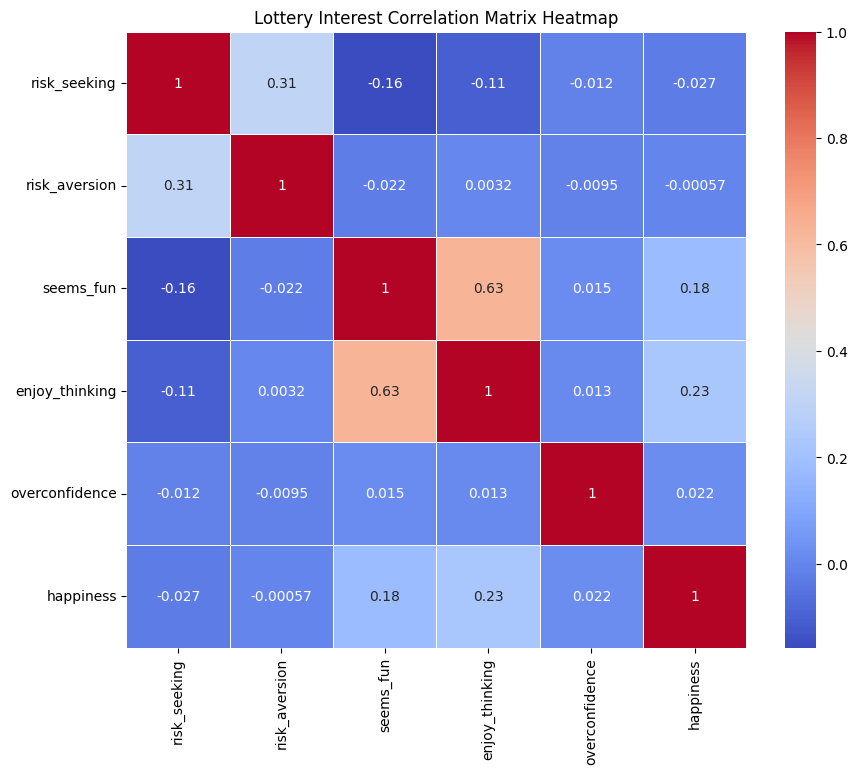

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
columns_of_interest = ['risk_seeking', 'risk_aversion', 'seems_fun', 'enjoy_thinking', 'overconfidence', 'happiness']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Lottery Interest Correlation Matrix Heatmap')
plt.show()

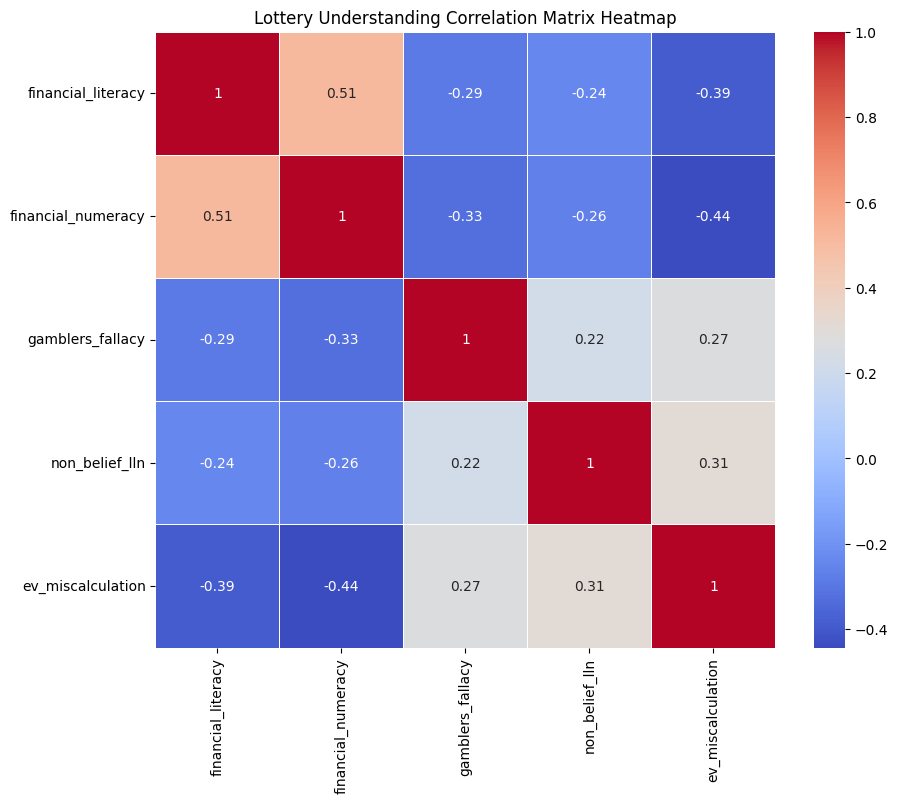

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
columns_of_interest = ['financial_literacy', 'financial_numeracy', 'gamblers_fallacy', 'non_belief_lln', 'ev_miscalculation']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Lottery Understanding Correlation Matrix Heatmap')
plt.show()

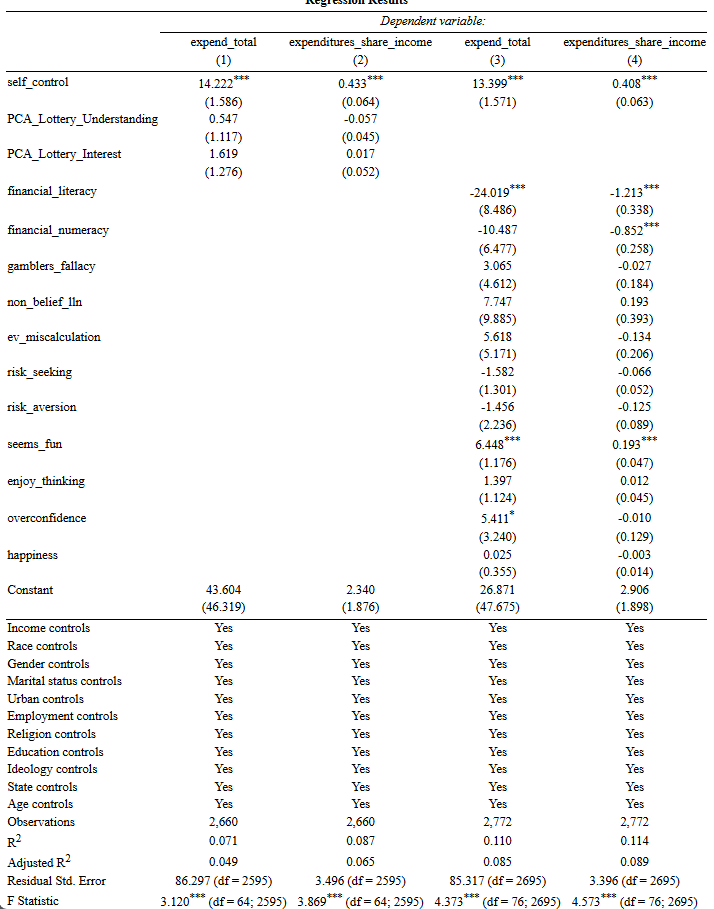

In [67]:
from IPython.display import Image

# Display the image
Image(filename=r'C:\Users\clint\Desktop\Coding Task Darthmouth\lottery_study\lottery_study\images\6.png')

Observing our PCA variables we see that our measure for lottery understanding and lottery intereest is insignificant which suggest, which suggest that lottery understanding and interest does not affect lottery expenditure. on the other hand self control. is significant, which suggest the aspec tof self control is what drives lottery activity. wherein people are addicted to it. With this said the data suggest that behavioural biases do play a big role in lottery expenditures in particular in the self control aspect of ebhavioural biases. this can eb some sort of addiction. 

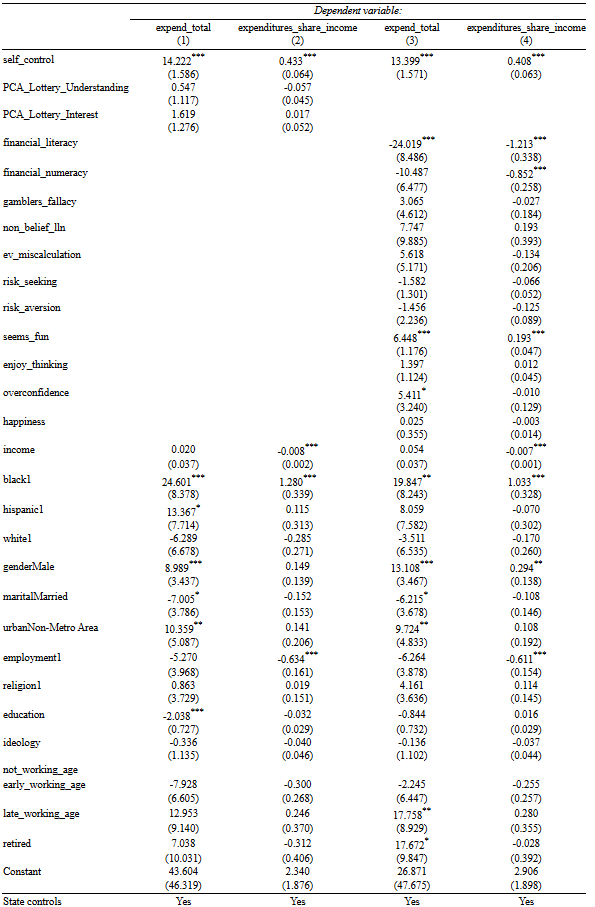

In [68]:
from IPython.display import Image

# Display the image
Image(filename=r'C:\Users\clint\Desktop\Coding Task Darthmouth\lottery_study\lottery_study\images\7.png')

To further investigate the role of behavioral biases, I decompose the PCA back into its components and observe the results. This analysis reveals that some behavioral biases significantly influence lottery expenditures. The coefficients for self-control and financial literacy are comparable, if not greater, than those of previously mentioned significant variables for lottery expenditure, such as race (being Black), gender (being male), and being in the late working age group. Overall, the data suggest that while some behavioral biases do impact lottery expenditure, only very specific biases are significant; most behavioral biases do not have a meaningful effect on lottery expenditures.

In [69]:
df.to_csv('lottery_study_updated_2.csv', index=False)